In [50]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
data = pd.read_csv('vehicles.csv')
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [40]:
data.describe() #gives us numerical columns of the dataset

,id,price,year,odometer,encoded_condition
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,426880.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,3.200112
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,2.475182
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,0.000000
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,1.000000
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,2.000000
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,6.000000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,6.000000


In [41]:
data.info() #gives us info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 426880 non-null  int64  
 1   region             426880 non-null  object 
 2   price              426880 non-null  int64  
 3   year               425675 non-null  float64
 4   manufacturer       409234 non-null  object 
 5   model              421603 non-null  object 
 6   condition          252776 non-null  object 
 7   cylinders          249202 non-null  object 
 8   fuel               423867 non-null  object 
 9   odometer           422480 non-null  float64
 10  title_status       418638 non-null  object 
 11  transmission       424324 non-null  object 
 12  VIN                265838 non-null  object 
 13  drive              296313 non-null  object 
 14  size               120519 non-null  object 
 15  type               334022 non-null  object 
 16  pa

In [42]:
data.isnull().sum() #checks for missing values

id                        0
region                    0
price                     0
year                   1205
manufacturer          17646
model                  5277
condition            174104
cylinders            177678
fuel                   3013
odometer               4400
title_status           8242
transmission           2556
VIN                  161042
drive                130567
size                 306361
type                  92858
paint_color          130203
state                     0
encoded_condition         0
dtype: int64

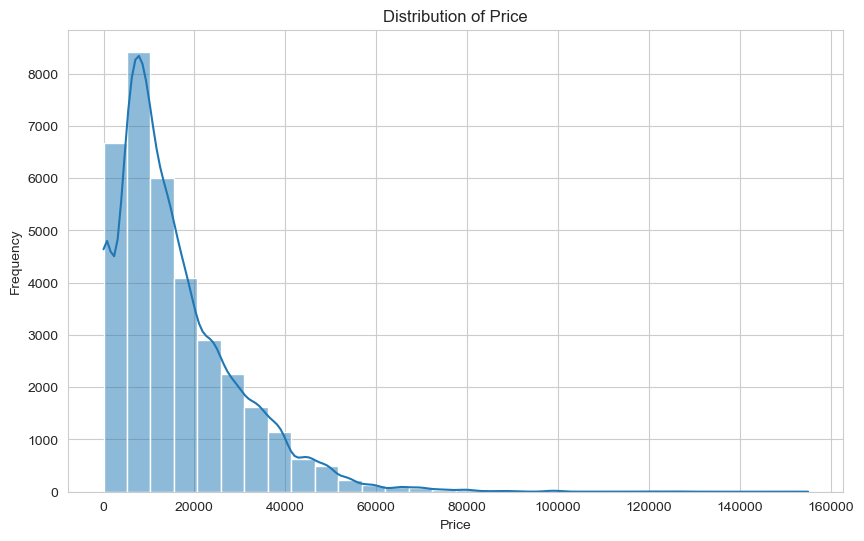

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

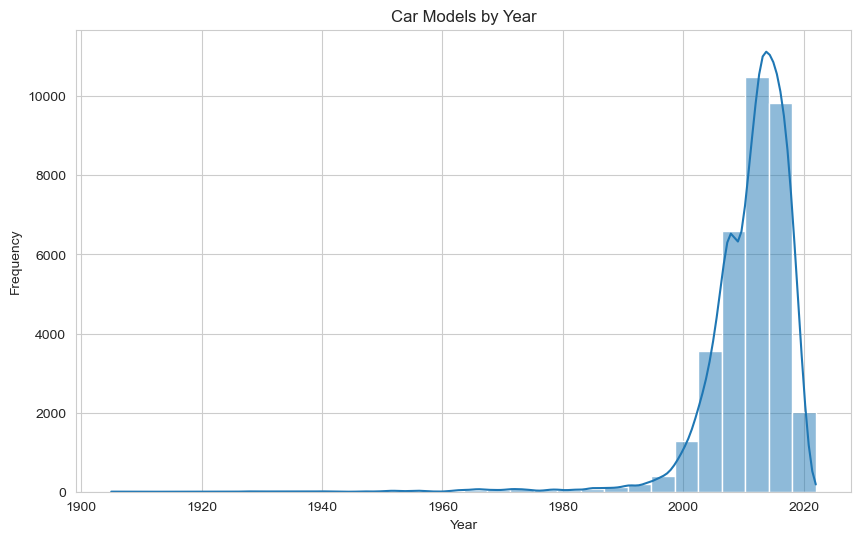

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data['year'], bins=30, kde=True)
plt.title("Car Models by Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

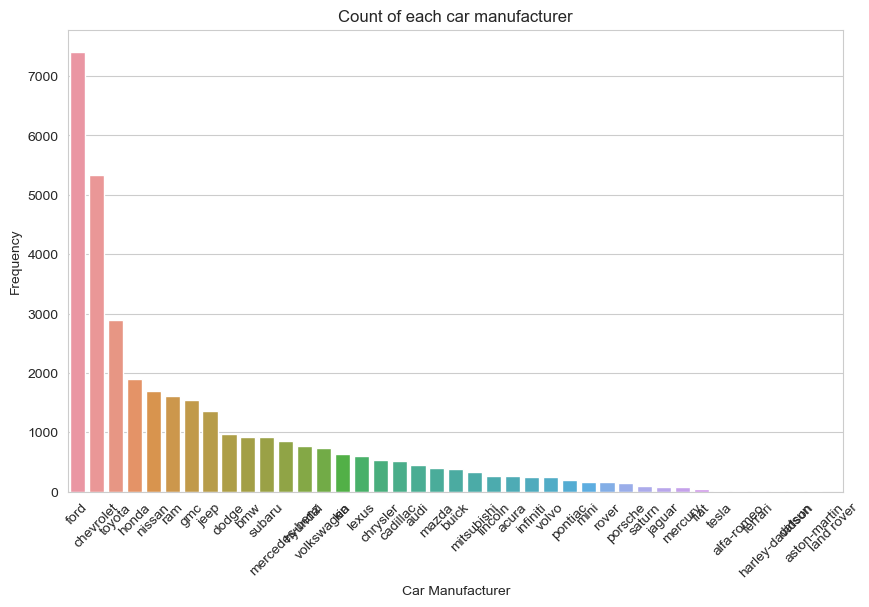

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=data['manufacturer'].value_counts().index, y=data['manufacturer'].value_counts())
plt.title("Count of each car manufacturer")
plt.xlabel("Car Manufacturer")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

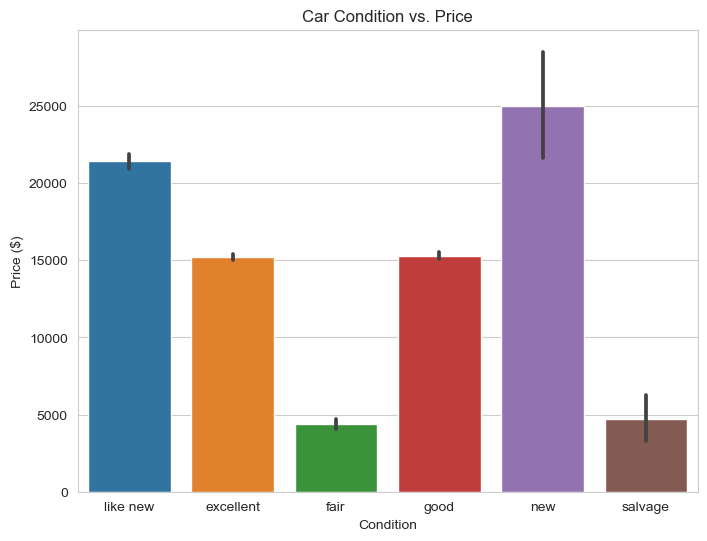

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot(x='condition', y='price', data=data)
plt.title("Car Condition vs. Price")
plt.xlabel("Condition")
plt.ylabel("Price ($)")
plt.show()

In [59]:
data.dropna() #drops all the values that contains NaN

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy


In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [ ]:
average_prices_condition = data.groupby('condition')['price'].mean().sort_values(ascending=False)

# Plot the average prices by condition
plt.figure(figsize=(10, 6))
average_prices_condition.plot(kind='bar', color='lightgreen')
plt.xlabel('Car Condition')
plt.ylabel('Average Price')
plt.title('Average Price by Car Condition')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

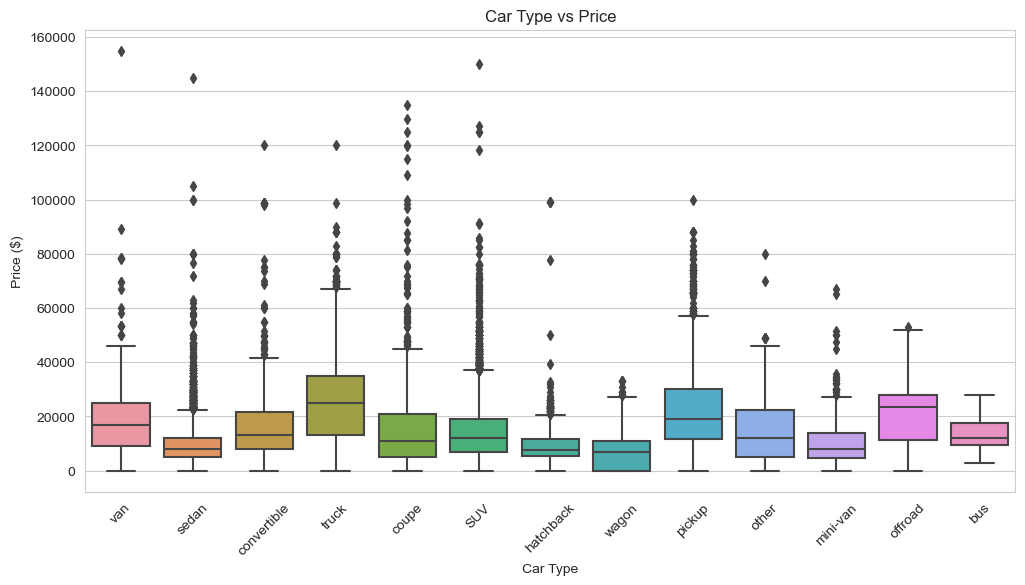

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and size of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='type', y='price', data=data)
plt.title('Car Type vs Price')
plt.xlabel('Car Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

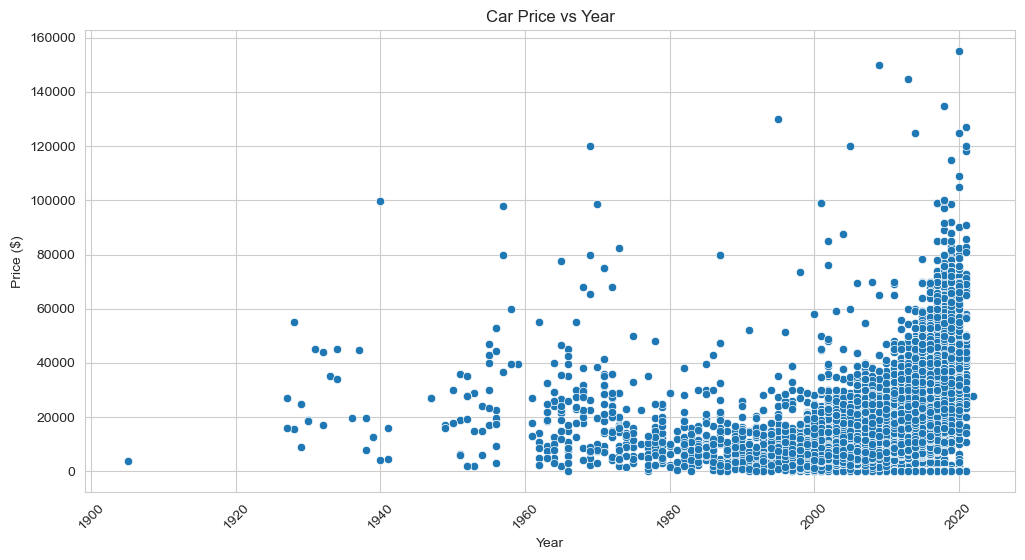

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and size of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create a scatter plot
sns.scatterplot(x='year', y='price', data=data)
plt.title('Car Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()